
# Project: Do demographic or economic factors affect male and/or female suicide rates?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Initial Data Wrangling</a></li>
<li><a href="#gdp">GDP vs. Male and Female Suicide Rates</a></li>
<li><a href="#gdpgrowth">GDP Growth Rate vs. Male and Female Suicide Rates</a></li>
<li><a href="#age">Median Age vs. Male and Female Suicide Rates</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The purpose of this analysis is to study the male and female suicide rates compared to actual GDP, GDP annual growth rate, and average median age and determine any correlation.

Dependent variables: male suicide rate, female suicide rate

Independent variables: actual GDP, GDP growth rate, median age

Questions:

1) Do either male or female suicide rates correlate with GDP? Do countries with higher GDPs tend to have higher or lower suicide rates? 

2) Do changes in GDP correlate with either male or female suicide rates? 

3) Is there any correlation between median age and male and/or female suicide rates? 

In [485]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Initial Data Wrangling

### General Properties

In [486]:
#Load datasets
df_suicide_male = pd.read_csv('Suicide male indicator file UL 20100916.csv', index_col=[0])
df_suicide_female = pd.read_csv('Suicide female indicator file UL 20100916.csv', index_col=[0])
df_gdp = pd.read_excel('GDPpercapitaconstant2000US.xlsx')
df_median_age = pd.read_csv('median_age.csv', index_col='Median age')
df_gdp_growth = pd.read_csv('gdp_annual_growth.csv', index_col=[0])




In [487]:
#Understand content of datasets
df_suicide_male.head()
df_suicide_female.head()
df_gdp_growth.head()
df_median_age.head()
df_gdp.head()

,Income per person (fixed 2000 US$),1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1313.722725,1381.040832,1454.022854,1525.723589,1594.495067,1681.613910,1804.419415,1857.352947,1915.424459,1965.707230
4,Algeria,1280.384828,1085.414612,855.947986,1128.41578,1170.323896,1215.015783,1127.614288,1200.558225,1291.863983,...,1871.921986,1971.512803,2043.135713,2115.186028,2124.957754,2155.485231,2173.787903,2192.703976,2231.980246,2255.225482


In [488]:
#rename index on df_gdp_growth
df_gdp_growth.index.rename('country', inplace=True) 

In [489]:
#rename index on suicide csvs
df_suicide_male.index.rename('country', inplace=True)
df_suicide_female.index.rename('country', inplace=True)

In [490]:
#set index on df_gdp
df_gdp.set_index('Income per person (fixed 2000 US$)', inplace=True)

In [491]:
#rename index on df_gdp
df_gdp.index.rename('country', inplace=True)

<a id='gdp'></a>
# How does actual GDP correlate with male and female suicide rates?


### Create and clean data sets  (2004 GDP, 2004 Male Suicide Rates, 2004 Female Suicide Rates)

In [492]:
df_gdp_2004 = df_gdp[['2004']] #I chose to only use 2004 data because it has significantly more data points

In [493]:
df_gdp_2004.dropna(how='all', axis=0, inplace=True) #drop countries with NaN values

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [494]:
df_suicide_male_2004 = df_suicide_male[['2004']] #Use just the 2004 data

In [495]:
df_suicide_male_2004.dropna(how='all', axis=0, inplace=True) #drop countries with NaN values

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [496]:
df_suicide_female_2004 = df_suicide_female[['2004']] #Use just the 2004 data

In [497]:
df_suicide_female_2004.dropna(how='all', axis=0, inplace=True) #drop countries with NaN values

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [498]:
#Add labels to 2004 columns
df_gdp_2004.rename(columns=lambda x: x[:4] + "_gdp", inplace=True)

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [499]:
df_suicide_male_2004.rename(columns=lambda x: x[:4] + "_suicide_male", inplace=True)

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [500]:
df_suicide_female_2004.rename(columns=lambda x: x[:4] + "_suicide_female", inplace=True)

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [501]:
#equalize indices

In [502]:
df_gdp_2004 = df_gdp_2004[df_gdp_2004.index.isin(df_suicide_male_2004.index)]


In [503]:
df_suicide_male_2004 = df_suicide_male_2004[df_suicide_male_2004.index.isin(df_gdp_2004.index)]

In [504]:
df_suicide_female_2004 = df_suicide_female_2004[df_suicide_female_2004.index.isin(df_gdp_2004.index)]

In [505]:
df_gdp_2004 = df_gdp_2004[df_gdp_2004.index.isin(df_suicide_female_2004.index)]

In [506]:
df_suicide_male_2004 = df_suicide_male_2004[df_suicide_male_2004.index.isin(df_suicide_female_2004.index)]

In [507]:
df_gdp_2004.index == df_suicide_male_2004.index #compare indices to be sure they are the same

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [508]:
df_suicide_female_2004.index == df_gdp_2004.index #make sure indices in all three datasets are identical

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [509]:
#Combine datasets
combined = pd.concat([df_gdp_2004, df_suicide_male_2004, df_suicide_female_2004], axis=1, join='inner')

### Visualize data sets

Compare suicide rates by actual GDP

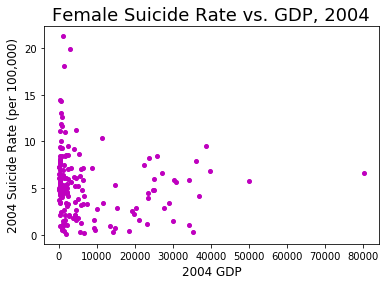

In [510]:
#Visualize 2004 GDP vs. 2004 Female Suicide Rates

female_gdp_plot = plt.plot(combined['2004_gdp'], combined['2004_suicide_female'], 'mo', markersize=4);
plt.title('Female Suicide Rate vs. GDP, 2004', fontsize=18)
plt.xlabel('2004 GDP', fontsize=12)
plt.ylabel('2004 Suicide Rate (per 100,000)', fontsize=12);



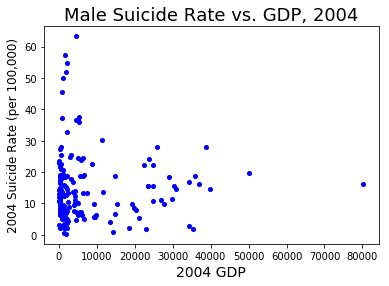

In [511]:
#Visualize 2004 GDP vs. 2004 Male Suicide Rates

male_gdp_plot = plt.plot(combined['2004_gdp'], combined['2004_suicide_male'], 'bo', markersize=4);
plt.title('Male Suicide Rate vs. GDP, 2004', fontsize=18)
plt.xlabel('2004 GDP',fontsize=14)
plt.ylabel('2004 Suicide Rate (per 100,000)', fontsize=12);



In [512]:
#Correlation 0f 2004 GDP and 2004 Male & Female Suicide Rates

combined.corr()

,2004_gdp,2004_suicide_male,2004_suicide_female
2004_gdp,1.000000,0.004044,-0.113976
2004_suicide_male,0.004044,1.000000,0.597675
2004_suicide_female,-0.113976,0.597675,1.000000


The correlation coefficient between the 2004 GDP and 2004 male suicide rate is almost zero. There is also a very low negative correlation coefficient (-0.11) between 2004 GDP and 2004 female suicide rates. 

With  a correlation coefficient of 0.59, there is a moderate positive correlation between male and female suicide rates.

#### Compare suicide by GDP quartiles

In [513]:
combined['2004_gdp'].describe() #find the quartiles

count      171.000000
mean      7443.649888
std      11848.095849
min         88.243053
25%        599.853707
50%       2043.135713
75%       6711.146187
max      80255.753889
Name: 2004_gdp, dtype: float64

In [514]:
bin_edges = [88.243053, 599.853707, 2043.135713, 6711.146187, 80255.753889] #use quartiles as bin edges

In [515]:
bin_names = ['low', 'medium low', 'medium high', 'high'] #label bin names

##### Male Suicide Rate by 2004 GDP Quartiles

In [516]:
combined['male_suicide_gdp'] = pd.cut(combined['2004_gdp'], bin_edges, labels=bin_names) #create new column based on bin edges and bin names

In [517]:
combined.groupby('male_suicide_gdp')['2004_suicide_male'].mean() #calculate mean suicide rate for each bin

male_suicide_gdp
low            13.522622
medium low     14.250281
medium high    16.306225
high           13.311920
Name: 2004_suicide_male, dtype: float64

In [518]:
male_suicide_gdp_mean = combined.groupby('male_suicide_gdp')['2004_suicide_male'].mean() #create new dataset with the above calculations

In [519]:
locations = [1, 2, 3, 4]

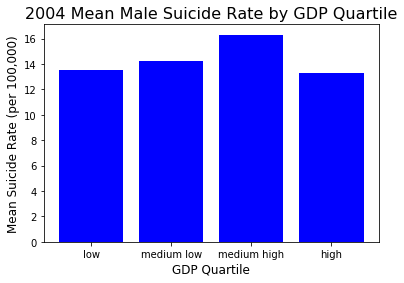

In [527]:
plt.bar(locations, male_suicide_gdp_mean, tick_label=bin_names, color='blue')
plt.title('2004 Mean Male Suicide Rate by GDP Quartile', fontsize=16)
plt.xlabel('GDP Quartile', fontsize=12)
plt.ylabel('Mean Suicide Rate (per 100,000)', fontsize=12);

#create a histogram showing mean suicide rate per GDP quartile

Male suicide rates do not seem to correlate with which GDP quartile a country is in. 

##### Female Suicide Rate by 2004 GDP Quartiles

In [521]:
combined['female_suicide_gdp'] = pd.cut(combined['2004_gdp'], bin_edges, labels=bin_names) #create new column based on bin edges and bin names

In [522]:
combined.groupby('female_suicide_gdp')['2004_suicide_female'].mean() #calculate the mean suicide rate for each bin

female_suicide_gdp
low            6.648659
medium low     5.660569
medium high    5.024216
high           4.030081
Name: 2004_suicide_female, dtype: float64

In [523]:
female_suicide_gdp_mean = combined.groupby('female_suicide_gdp')['2004_suicide_female'].mean() #create new data set with the above calculations

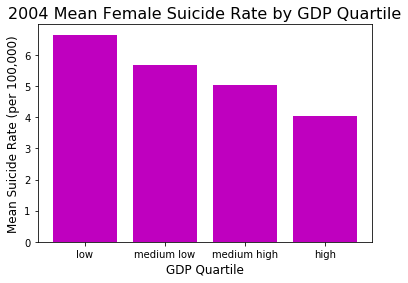

In [528]:
plt.bar(locations, female_suicide_gdp_mean, tick_label=bin_names, color='m')
plt.title('2004 Mean Female Suicide Rate by GDP Quartile', fontsize=16)
plt.xlabel('GDP Quartile', fontsize=12)
plt.ylabel('Mean Suicide Rate (per 100,000)', fontsize=12);

#creat a histogram showing mean suicide rate per gdp quartile

It appears that when grouped into GDP quartiles, female suicide rates clearly decrease as GDP increases. The female suicide rate for countries is 6.65 in the lowest GDP category and 4.03 in the highest GDP category.

##### Suicide Rates By Gender


In [474]:
mean_suicide_df = combined.drop(['2004_gdp'], axis=1) #drop 2004_gdp column

In [475]:
mean_suicide_df = mean_suicide_df.mean()

In [476]:
mean_male_suicide = combined['2004_suicide_male'].mean() #calculate the mean 2004 male suicide rate
mean_female_suicide = combined['2004_suicide_female'].mean() #calculate the mean 2004 female suicide rate

In [477]:
#Create a histogram to visualize the 2004 mean male and female suicide rates
locations = [1, 2]
heights = [mean_male_suicide, mean_female_suicide]
labels = ['Male', 'Female']
colors = ['blue', 'magenta']

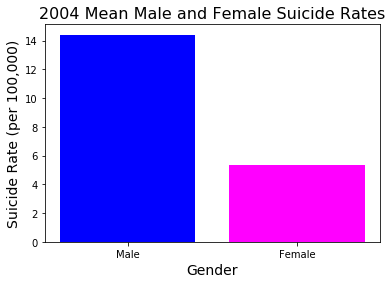

In [479]:
plt.bar(locations, heights, tick_label=labels, color=colors)
plt.title('2004 Mean Male and Female Suicide Rates', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Suicide Rate (per 100,000)', fontsize=14);

The 2004 mean male suicide rate was 14.4 per 100,000 while the 2004 mean female suicide rate was 5.34 per 100,000, indicating that suicide affects males at a much higher rate than females. 

<a id='gdpgrowth'></a>
# How does the GDP growth rate correlate with male and female suicide rates?

In [529]:
df_gdp_growth.dropna(axis=1, how='all', inplace=True) #drop 1960 and 2011 columns because all are NaN

In [530]:
#Male suicide- delete columns prior to 1964 because there is minimal data
df_suicide_m_gdp_growth = df_suicide_male.drop(df_suicide_male.columns[0:14], axis=1)

In [531]:
#Female suicide- delete columns prior to 1964 because there is minimal data
df_suicide_f_gdp_growth = df_suicide_female.drop(df_suicide_female.columns[0:14], axis=1)

In [532]:
#GDP Growth- delete columns after 2004
df_gdp_growth_suicide_m = df_gdp_growth.drop(df_gdp_growth.columns[44:50], axis=1)
df_gdp_growth_suicide_f = df_gdp_growth.drop(df_gdp_growth.columns[44:50], axis=1)

In [533]:
#delete years up until 1981 to prevent deleting more countries when combining the datasets
df_gdp_growth_suicide_m = df_gdp_growth_suicide_m.drop(df_gdp_growth_suicide_m.columns[0:20], axis=1)
df_gdp_growth_suicide_f = df_gdp_growth_suicide_f.drop(df_gdp_growth_suicide_f.columns[0:20], axis=1)
df_suicide_m_gdp_growth = df_suicide_m_gdp_growth.drop(df_suicide_m_gdp_growth.columns[0:17], axis=1)
df_suicide_f_gdp_growth = df_suicide_f_gdp_growth.drop(df_suicide_f_gdp_growth.columns[0:17], axis=1)

In [534]:
#Drop rows with any NaNs
df_suicide_m_gdp_growth = df_suicide_m_gdp_growth.dropna(axis=0, how='any')
df_suicide_f_gdp_growth = df_suicide_f_gdp_growth.dropna(axis=0, how='any')


In [535]:
#Equalize indices of dataframes to be compared (male)
df_suicide_m_gdp_growth= df_suicide_m_gdp_growth[df_suicide_m_gdp_growth.index.isin(df_gdp_growth_suicide_m.index)]


In [536]:
df_gdp_growth_suicide_m = df_gdp_growth_suicide_m[df_gdp_growth_suicide_m.index.isin(df_suicide_m_gdp_growth.index)]

In [537]:
df_suicide_m_gdp_growth.index == df_gdp_growth_suicide_m.index #confirm indices match

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [538]:
#Equalize indices of dataframes to be compared (female)
df_suicide_f_gdp_growth = df_suicide_f_gdp_growth[df_suicide_f_gdp_growth.index.isin(df_gdp_growth_suicide_f.index)]

In [539]:
df_gdp_growth_suicide_f = df_gdp_growth_suicide_f[df_gdp_growth_suicide_f.index.isin(df_suicide_f_gdp_growth.index)]

In [540]:
df_suicide_f_gdp_growth.index == df_gdp_growth_suicide_f.index #confirm indices match

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

Female suicide rates vs. GDP growth rates visualized

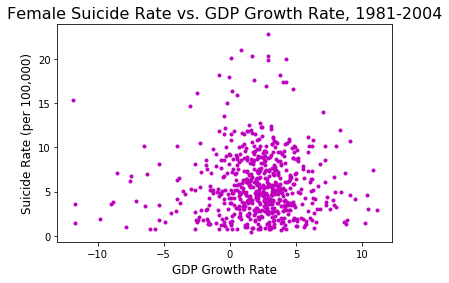

In [542]:
#Visualize female suicide rates vs. GDP growth rates for all countries and years
female_plot = plt.plot(df_gdp_growth_suicide_f, df_suicide_f_gdp_growth, 'mo', markersize=3);
plt.title('Female Suicide Rate vs. GDP Growth Rate, 1981-2004', fontsize=16)
plt.xlabel('GDP Growth Rate', fontsize=12)
plt.ylabel('Suicide Rate (per 100,000)', fontsize=12);

In [340]:
#Correlation between Female Suicide Rates 1981-2004 and GDP Growth Rates 1981-2004
df_gdp_growth_suicide_f.corrwith(df_suicide_f_gdp_growth).mean()

0.018115445946065286

With a correlation of 0.018, this indicates there is no assocation between female suicide rates and GDP growth rates.

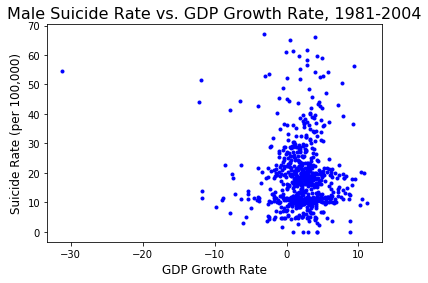

In [543]:
#Visualize male suicide rates vs. GDP growth rates for all countries and years
male_plot = plt.plot(df_gdp_growth_suicide_m, df_suicide_m_gdp_growth, 'bo', markersize=3);
plt.title('Male Suicide Rate vs. GDP Growth Rate, 1981-2004', fontsize=16)
plt.xlabel('GDP Growth Rate', fontsize=12)
plt.ylabel('Suicide Rate (per 100,000)', fontsize=12);

In [342]:
#Correlation between Male Suicide Rates 1981-2004 and GDP Growth Rates 1981-2004
df_gdp_growth_suicide_m.corrwith(df_suicide_m_gdp_growth).mean()

0.014914127791488827

As with the female results, there is little to no assocation between male suicide rates and GDP growth rates

The results indicate that individual GDP growth increases or decreases per year does not, on average, have a significant correlation with suicide rates, male or female. Annual economic changes are not correlated with suicide rates. Issues with this analysis could be that the majority of the countries analyzed already are economically wealthy and therefore annual increases or decreases in GDP have less of an affect on basic needs. Another issue could be that there is a lag time between increased or decreased rates and GDP growth changes.

<a id='age'></a>
# Does median age correlate with male and/or female suicide rates?

Here we will be comparing median age vs both male suicide rates and female suicide rates

In [343]:
df_median_age.index.rename('country', inplace=True) #rename index

In [344]:
#Create new male and female suicide dataframes with columns for every 5 years to match columns in median age dataframe
cols_of_interest = ['1950', '1955', '1960', '1965', '1970', '1975', '1980', '1985', '1990', '1995', '2000']
df_suicide_male_med_age = df_suicide_male[cols_of_interest]
df_suicide_female_med_age = df_suicide_female[cols_of_interest]

In [345]:
#delete 1950 column because there are only 10 countries
df_suicide_male_med_age.drop(['1950'], axis=1, inplace=True)
df_suicide_female_med_age.drop(['1950'], axis=1, inplace=True)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [346]:
#delete rows with any NaNs
df_suicide_male_med_age.dropna(axis=0, how='any', inplace=True)
df_suicide_female_med_age.dropna(axis=0, how='any', inplace=True)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [347]:
#Create median age dataframe to compare to female suicide rate with same indices
df_med_age_suicide_f = df_median_age[df_median_age.index.isin(df_suicide_female_med_age.index)]


In [348]:
df_med_age_suicide_f.index == df_suicide_female_med_age.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [349]:
#Create median age dataframe to compare to male suicide rate with same indices
df_med_age_suicide_m = df_median_age[df_median_age.index.isin(df_suicide_male_med_age.index)]

In [350]:
df_med_age_suicide_m.index == df_suicide_male_med_age.index #confirm indices match

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [351]:
#Visualize male suicide rates vs median age

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  warnings.warn(message, mplDeprecation, stacklevel=1)


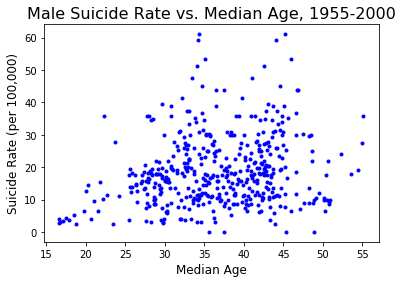

In [544]:
male_age_plot = plt.plot(df_med_age_suicide_m, df_suicide_male_med_age, 'bo', markersize=3);
plt.title('Male Suicide Rate vs. Median Age, 1955-2000', fontsize=16)
plt.xlabel('Median Age', fontsize=12)
plt.ylabel('Suicide Rate (per 100,000)', fontsize=12);

In [353]:
#Correlation of male suicide rates vs median age
df_med_age_suicide_m.corrwith(df_suicide_male_med_age).mean()

0.4086736287601823

With a correlation coefficient of .408, it appears there is a weak correlation between median age and suicide rates.

In [354]:
#Visualize female suicide rates vs median age

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  warnings.warn(message, mplDeprecation, stacklevel=1)


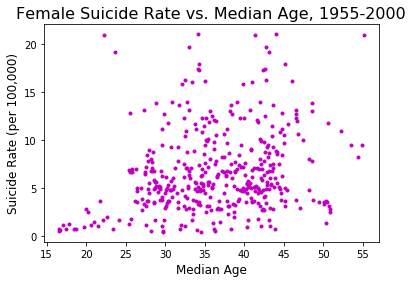

In [423]:
female_age_plot = plt.plot(df_med_age_suicide_f, df_suicide_female_med_age, 'mo', markersize=3);
plt.title('Female Suicide Rate vs. Median Age, 1955-2000', fontsize=16)
plt.xlabel('Median Age', fontsize=12)
plt.ylabel('Suicide Rate (per 100,000)', fontsize=12);

In [356]:
#Correlation of female suicide rates vs median age
df_med_age_suicide_f.corrwith(df_suicide_female_med_age).mean()

0.5119491660653578

There is a correlation coefficient of 0.512 between median age and female suicide rates. This indicates a moderate correlation between median age and female suicide rates.

<a id='conclusions'></a>
## Conclusions

> **Suicide rates and GDP**: There appears to be no correlation between GDP and male suicide rates. However, it does appear that there is a slight negative correlation between GDP and female suicide rates. It is especially clear when grouped into quartiles; the highest GDP quartile has a nearly 40% lower rate of female suicide than the lowest GDP quartile.

> **Suicide rates and GDP growth rates**: The data shows no correlation between GDP growth rates and either male or female suicide rates. It was hypothesized that a perceived change in lifestyle, positive or negative, could be more strongly associated with suicide rates than actual GDP, but this does not appear to be the case. It is possible that there is a time lag and that suicide rates would not be affected immediately.

> **Suicide rates and age**: There is a weak correlation between male suicide rates and median age and a moderate correlation between female suicide rates and median age. There could be several explanations. The ratio of children (who commit suicide at far lower rates) to adults is likely lower as the median age increases. The rate of suicide amongst middle age and older people could also be increasing at a faster rate, which would cause the overall suicide rate to increase as age increases.

In [357]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0